In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading datasets
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [11]:
# Merge datasets to combine customer and transaction information
merged_df = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")

In [16]:
# Step 1: Create customer profiles (aggregating transaction data)
customer_profiles = (
    merged_df.groupby("CustomerID")
    .agg({
        "Quantity": "sum",     # Total quantity purchased
        "TotalValue": "sum",   # Total spending
    })
    .reset_index()
)

In [17]:
# Step 2: Normalize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(customer_profiles[["Quantity", "TotalValue"]])

In [18]:
# Step 3: Perform clustering (using K-Means)
num_clusters = 4  # You can adjust this between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(scaled_features)

In [19]:
# Step 4: Evaluate clustering performance using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_profiles["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7394134221422329


In [20]:
# Step 5: Visualize the clusters
# Add cluster labels to the normalized features for visualization
visual_df = pd.DataFrame(scaled_features, columns=["Quantity", "TotalValue"])
visual_df["Cluster"] = customer_profiles["Cluster"]


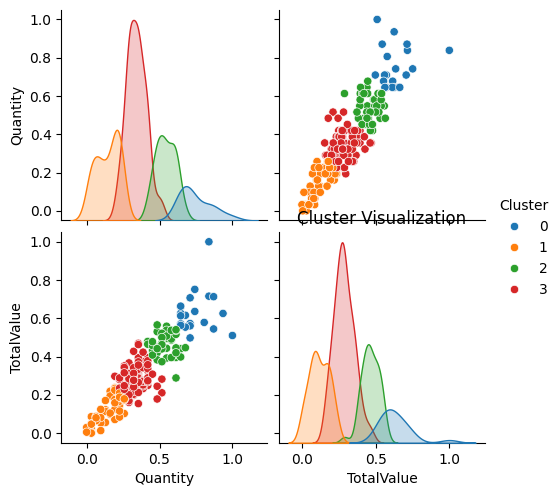

In [21]:
# Pairplot to visualize clusters
sns.pairplot(visual_df, hue="Cluster", palette="tab10", diag_kind="kde")
plt.title("Cluster Visualization")
plt.show()

In [22]:
# Step 6: Save clustering results
customer_profiles.to_csv("Customer_Segments.csv", index=False)

In [23]:
# Display basic cluster information
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(customer_profiles[customer_profiles["Cluster"] == cluster].describe(), "\n")

Cluster 0:
        Quantity    TotalValue  Cluster
count  21.000000     21.000000     21.0
mean   24.190476   6780.821905      0.0
std     3.310877   1155.035822      0.0
min    21.000000   5354.880000      0.0
25%    21.000000   6044.630000      0.0
50%    23.000000   6604.230000      0.0
75%    27.000000   7111.320000      0.0
max    32.000000  10673.870000      0.0 

Cluster 1:
        Quantity   TotalValue  Cluster
count  47.000000    47.000000     47.0
mean    5.446809  1330.696809      1.0
std     2.447790   703.095526      0.0
min     1.000000    82.360000      1.0
25%     3.000000   866.900000      1.0
50%     6.000000  1284.270000      1.0
75%     8.000000  1936.235000      1.0
max     9.000000  2598.330000      1.0 

Cluster 2:
        Quantity   TotalValue  Cluster
count  42.000000    42.000000     42.0
mean   17.761905  4984.632857      2.0
std     2.045930   621.786689      0.0
min    14.000000  3137.660000      2.0
25%    16.000000  4566.067500      2.0
50%    18.000000  